In [216]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


In [217]:
# Define the equation as a Python function
def equation(f, lambda_val):
    return lambda_val * f + 1 / (1 + abs(f)) - (2/6) / ((1/6) + abs(f))

# Find distinct equilibrium values for f
def find_distinct_roots(lambda_val, num_initial_guesses=100, margin=0.1):
    # Set the value of lambda
    initial_guesses = np.linspace(-2, 2, num_initial_guesses)
    fequilibria = []
    roots = []

    for initial_guess in initial_guesses:
        root = fsolve(equation, x0=initial_guess, args=(lambda_val,))
        if root not in roots:
            roots.append(root)
            fequilibria.append(root[0])

    distinct_roots = []
    for num in fequilibria:
        is_distinct = True

        # Check if the current number is different from all other numbers in the distinct list
        for distinct_num in distinct_roots:
            if abs(num - distinct_num) <= margin:
                is_distinct = False
                break

        # If the number is distinct, add it to the distinct list
        if is_distinct:
            distinct_roots.append(num)

    return np.sort(distinct_roots)

def main(lambda_val):
    distinct_roots = find_distinct_roots(lambda_val)
    
    if lambda_val < 0.333801:
        f1, f2, f3 = distinct_roots[0], distinct_roots[1], distinct_roots[2]
        print(f1, f2, f3)
        return f1, f2, f3
    else:
        f3 = distinct_roots[1]
        print(f3)
        return f3

# make user input to be lambda_val
lambda_val = float(input("Enter lambda value: "))
print("The choosen lambda value is: ", lambda_val)

if lambda_val < 0.333801:
    f1, f2, f3 = main(lambda_val)
else:
    f3 = main(lambda_val)


The choosen lambda value is:  1.0
0.15950935256698456


/Users/karlfindhansen/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/karlfindhansen/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [218]:
def calculate_stationary_points():
    if lambda_val < 0.333801:
        x1, y1 = (1/6) / ((1/6) + abs(f1)), 1 / (1 + abs(f1))
        x2, y2 = (1/6) / ((1/6) + abs(f2)), 1 / (1 + abs(f2))
        x3, y3 = (1/6) / ((1/6) + abs(f3)), 1 / (1 + abs(f3))

        print(f'x1 = {x1}, y1 = {y1}')
        print(f'x2 = {x2}, y2 = {y2}')
        print(f'x3 = {x3}, y3 = {y3}')

        return x1, y1, x2, y2, x3, y3
    
    else:
        x3, y3 = (1/6) / ((1/6) + abs(f3)), 1 / (1 + abs(f3))
        print(f'x3 = {x3}, y3 = {y3}')
        return x3, y3
    
if lambda_val < 0.333801:
    x1, y1, x2, y2, x3, y3 = calculate_stationary_points()
else:
    x3, y3 = calculate_stationary_points()


x3 = 0.5109715516739982, y3 = 0.8624337507810056


In [219]:
def g(x, y, delta):
    return delta * (1 - x) - abs((1 / lambda_val) * (-y + 2 * x)) * x

def h(x, y):
    return 1 - y - abs((1 / lambda_val) * (-y + 2 * x)) * y

def gneg(x, y, delta):
    return delta * (1 - x) - (-(1 / lambda_val) * (-y + 2 * x)) * x

def hneg(x, y):
    return 1 - y - (-(1 / lambda_val) * (-y + 2 * x)) * y

def gplus(x, y, delta):
    return delta * (1 - x) - ((1 / lambda_val) * (-y + 2 * x)) * x

def hplus(x, y):
    return 1 - y - ((1 / lambda_val) * (-y + 2 * x)) * y


# Calculate Jacobian for negative equilibrium point

In [220]:
x, y = sp.symbols('x y')
delta = 1/6  # Set delta value as needed
Jneg = sp.Matrix([[sp.diff(gneg(x, y, delta), x), sp.diff(gneg(x, y, delta), y)],
                 [sp.diff(hneg(x, y), x), sp.diff(hneg(x, y), y)]])
sp.init_printing()
Jneg

⎡4.0⋅x - y - 0.166666666666667       -1.0⋅x      ⎤
⎢                                                ⎥
⎣            2.0⋅y              2.0⋅x - 2.0⋅y - 1⎦

In [221]:
if lambda_val < 0.333801:
    J1 = Jneg.subs({x: x1, y: y1})
    sp.init_printing()
    display(J1)
else:
    print("There are no equilibria with f < 0")

There are no equilibria with f < 0


In [222]:
if lambda_val < 0.333801:
    # Calculate eigenvalues and eigenvectors of J1
    eigenvalues = sp.Matrix(J1).eigenvals()
    eigenvectors = sp.Matrix(J1).eigenvects()
    
    sp.init_printing()
    # Print eigenvalues
    print("Eigenvalues:")
    for eigenvalue in eigenvalues:
        display(eigenvalue)
    
    # Print eigenvectors
    print("Eigenvectors:")
    for eigenvector in eigenvectors:
        display(eigenvector[2])
else:
    print("Only one equilibrium (x3, y3)")

Only one equilibrium (x3, y3)


In [223]:
if lambda_val < 0.333801:
    J2 = Jneg.subs({x: x2, y: y2})
    sp.init_printing()
    display(J2)
else:
    print("There are no equilibria with f < 0")

There are no equilibria with f < 0


In [224]:
if lambda_val < 0.333801:
    # Calculate eigenvalues and eigenvectors of J1
    eigenvalues = sp.Matrix(J2).eigenvals()
    eigenvectors = sp.Matrix(J2).eigenvects()
    
    sp.init_printing()
    # Print eigenvalues
    print("Eigenvalues:")
    for eigenvalue in eigenvalues:
        display(eigenvalue)
    
    # Print eigenvectors
    print("Eigenvectors:")
    for eigenvector in eigenvectors:
        display(eigenvector[2])
else:
    print("Only one equilibrium (x3, y3)")

Only one equilibrium (x3, y3)


# Calculate Jacobian for positive equilibrium point

In [225]:
Jplus = sp.Matrix([[sp.diff(gplus(x, y, delta), x), sp.diff(gplus(x, y, delta), y)],
                 [sp.diff(hplus(x, y), x), sp.diff(hplus(x, y), y)]])
sp.init_printing()
Jplus

⎡-4.0⋅x + 1.0⋅y - 0.166666666666667        1.0⋅x       ⎤
⎢                                                      ⎥
⎣              -2.0⋅y                -2.0⋅x + 2.0⋅y - 1⎦

In [226]:
J3 = Jplus.subs({x: x3, y: y3})
sp.init_printing()
display(J3)

⎡-1.34811912258165  0.510971551673998 ⎤
⎢                                     ⎥
⎣-1.72486750156201  -0.297075601785985⎦

In [227]:
eigenvalues = sp.Matrix(J3).eigenvals()
eigenvectors = sp.Matrix(J3).eigenvects()

sp.init_printing()
# Print eigenvalues
print("Eigenvalues:")
for eigenvalue in eigenvalues:
    display(eigenvalue)

# Print eigenvectors
print("Eigenvectors:")
for eigenvector in eigenvectors:
    raw_eigenvector = eigenvector[2][0]  # Access the raw eigenvector
    display(raw_eigenvector)

Eigenvalues:


Eigenvectors:


⎡ -0.396137517723794 + 0.267603977972232⋅ⅈ ⎤
⎢                                          ⎥
⎣-1.1333930727271e-64 + 0.878329766104433⋅ⅈ⎦

⎡-0.372624820976947 + 0.551601185986097⋅ⅈ ⎤
⎢                                         ⎥
⎣-1.2230291729346 + 3.48049668134959e-64⋅ⅈ⎦

# Plot contour plot

In [228]:
def plot_lambda_bigger_than_val():
    fig, ax = plt.subplots()
    x_range = np.linspace(0, 1, 100)
    y_range = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = (1 / lambda_val) * (-Y + 2 * X)
    
    # Contour plot
    contour = ax.contour(X, Y, Z, levels=[0], colors='green', linewidths=2)
    ax.clabel(contour, inline=1, fontsize=10)
    ax.set_xlabel('x (salinity)')
    ax.set_ylabel('y (temperature)')
    
    # Add a red disk to the plot
    ax.add_artist(plt.Circle((x3, y3), 0.01, color='red'))
    
    # Create a stream plot in the same plot
    U = g(X, Y, 1/6)
    V = h(X, Y)
    ax.streamplot(X, Y, U, V, density=1, color='blue')

    # Show the combined plot
    plt.show()

def plot_lambda_smaller_than_value():
    fig, ax = plt.subplots()
    x_range = np.linspace(0, 1, 100)
    y_range = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = (1 / lambda_val) * (-Y + 2 * X)
    
    # Contour plot
    contour = ax.contour(X, Y, Z, levels=[0], colors='green', linewidths=2)
    ax.clabel(contour, inline=1, fontsize=10)
    ax.set_xlabel('x (salinity)')
    ax.set_ylabel('y (temperature)')
    
    # Add disks to the same plot
    disks = plt.Circle((x1, y1), 0.01, color='red'), plt.Circle((x2, y2), 0.01, color='red'), plt.Circle((x3, y3), 0.01, color='red')
    for disk in disks:
        ax.add_artist(disk)

    # Create a stream plot in the same plot
    U = g(X, Y, 1/6)
    V = h(X, Y)
    ax.streamplot(X, Y, U, V, density=1, color='grey', linewidth=0.5)
    ax.streamplot(X, Y, U, V, density=1, color='blue', linewidth=1)

    # Show the combined plot
    plt.show()

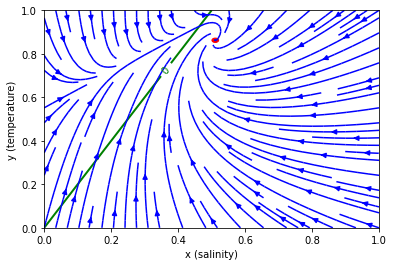

In [229]:
def phase_portrait():
    if lambda_val < 0.333801:
        plot_lambda_smaller_than_value()
    else:
        plot_lambda_bigger_than_val()

phase_portrait()